# Lead Scoring Case Study

### Steps
1. Import data
2. Analysing the data columns
3. Data cleaning
4. EDA
5. Dummy Variable Creation for Model
6. Train Test Data
7. Scaling of Continous Data values
8. Model Preparation and evaluation
9. Model fine tuning
10. Finalising Model
11. Confirmation with Model Metrics
12. Evaluation on Test Data
13. Preparation of Lead Score

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
leads = pd.read_csv('Leads.csv')

### Analysing the Data

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Check for duplicate records

In [6]:
leads[leads.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [7]:
initialdatarecords = leads.shape[0]
print("Initial Number of Data Records - ", initialdatarecords)

Initial Number of Data Records -  9240


#### Checking Missing Data

In [8]:
round(leads.isnull().sum()*100/leads.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Checking the values of the different columns
for col in leads.iloc[:,1:].select_dtypes(include='object').columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True))
    print("========================================================")
    
for col in leads.iloc[:,1:].select_dtypes(include='float').columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True))
    print("========================================================") 

for col in leads.iloc[:,1:].select_dtypes(include='int').columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True))
    print("========================================================")

Lead Origin
--------------------------------------------------------
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Lead Source
--------------------------------------------------------
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source,

### Data Cleaning and Preparation

### Many fields have very skewed data with a significant majority data of more than 90% having one value. 
#### The values of these fields are skewed and not normally distributed. So they would not contribute significantly to the final model
 1. Do Not Email - 92.1 %
 2. Do Not Call - 99.9 %
 3. Country - 95.8 %
 4. What matters most to you in choosing a course - 99.9 %
 5. Search 99.8 %
 6. Magazine 100 %
 7. Newspaper Article - 99.9 %
 8. X Education Forums 99.9 %
 9. Newspaper 99.9 %
 10. Digital Advertisement 99.9 %
 11. Through Recommendations 99.9 %
 12. Receive More Updates About Our Courses 100 %
 13. Update me on Supply Chain Content 100 %
 14. Get updates on DM Content 100%
 15. I agree to pay the amount through cheque 100 %

In [10]:
droplist =  ['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
leads = leads.drop(droplist,1)


#### Four Fields have a value called "Select" which is equivalent to Null Value when any option is not selected in a webpage form
##### Converting the "Select" value as nan for the four columns under consideration
 1. Specialization
 2. How did you hear about X Education
 3. Lead Profile
 4. City

In [11]:
leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['City'] = leads['City'].replace('Select', np.nan)

In [12]:
# Missing Data in percentages 
round(leads.isnull().sum()*100/leads.shape[0], 4)

Prospect ID                                0.0000
Lead Number                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
Specialization                            36.5801
How did you hear about X Education        78.4632
What is your current occupation           29.1126
Tags                                      36.2879
Lead Quality                              51.5909
Lead Profile                              74.1883
City                                      39.7078
Asymmetrique Activity Index               45.6494
Asymmetrique Profile Index                45.6494
Asymmetrique Activity Score               45.6494
Asymmetrique Profile Score                45.6494


In [13]:
# Checking for unique values in the columns
leads.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                 21
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Specialization                              18
How did you hear about X Education           9
What is your current occupation              6
Tags                                        26
Lead Quality                                 5
Lead Profile                                 5
City                                         6
Asymmetrique Activity Index                  3
Asymmetrique Profile Index                   3
Asymmetrique Activity Score                 12
Asymmetrique Profile Score                  10
A free copy of Mastering The Interview       2
Last Notable 

##### Since Prospect ID is a unique IDs representing each data records, these will not help in the analysis. This can be dropped.

In [14]:
leads = leads.drop(['Prospect ID'],1)

In [15]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,NaN,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,NaN,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,Other,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


#### Handling missing values of specific columns and also checking data variance

In [16]:
for col in leads[['How did you hear about X Education','Lead Quality','Lead Profile']].columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True)*100)
    print("========================================================")


How did you hear about X Education
--------------------------------------------------------
Online Search            40.603015
Word Of Mouth            17.487437
Student of SomeSchool    15.577889
Other                     9.346734
Multiple Sources          7.638191
Advertisements            3.517588
Social Media              3.366834
Email                     1.306533
SMS                       1.155779
Name: How did you hear about X Education, dtype: float64
Lead Quality
--------------------------------------------------------
Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64
Lead Profile
--------------------------------------------------------
Potential Lead                 67.631027
Other Leads                    20.419287
Student of SomeSchool          10.104822
Lateral Student                 1.006289
Dual Specialization Student     0.838574
N

In [17]:
# Dropping columns with high level of missing values and also value spread. Taking 50%  as cutoff for immediate dropping
leads = leads.drop(['How did you hear about X Education','Lead Profile', 'Lead Quality'],1)

In [18]:
# For missing values between 25% to 50%, looking at spread of values to decide to impute or drop
# Specialization,What is your current occupation, Tags, City, Asymmetrique Activity Index,Asymmetrique Profile Index
# Asymmetrique Activity Score,Asymmetrique Profile Score

In [19]:
# Handling missing values of specific columns and also checking data spread
for col in leads[['Specialization','What is your current occupation','Tags','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']].columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True)*100)
    print("========================================================")


Specialization
--------------------------------------------------------
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64
What is your current occupation
-------------

In [20]:
# 'What is your current occupation' has Unemployed as 85% and 29% missing values.
# Considering these two aspects, we can drop this
leads = leads.drop(['What is your current occupation'],1)

In [21]:
round(leads.isnull().sum()*100/leads.shape[0], 4)

Lead Number                                0.0000
Lead Origin                                0.0000
Lead Source                                0.3896
Converted                                  0.0000
TotalVisits                                1.4827
Total Time Spent on Website                0.0000
Page Views Per Visit                       1.4827
Last Activity                              1.1147
Specialization                            36.5801
Tags                                      36.2879
City                                      39.7078
Asymmetrique Activity Index               45.6494
Asymmetrique Profile Index                45.6494
Asymmetrique Activity Score               45.6494
Asymmetrique Profile Score                45.6494
A free copy of Mastering The Interview     0.0000
Last Notable Activity                      0.0000
dtype: float64

In [22]:
# Asymmetrique Activity Index and Asymmetrique Profile Index are categorical data with 45% missing values
# Dropping these 
leads = leads.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index'],1)

In [23]:
# Looking at 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score'
percentlist = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0]
includelist = ['object', 'float', 'int']
leads[['Asymmetrique Activity Score','Asymmetrique Profile Score']].describe(percentiles = percentlist, include = includelist)

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
10%,13.000000,15.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
90%,16.000000,19.000000
95%,17.000000,20.000000


In [24]:
# Asymmetrique Activity Score and Asymmetrique Profile Score are continuous features with 45% missing values
# The values seems to have an even distribition. So imputing the missing data with the 50 pecrcentile values value

asymactivityscore50percentile = leads['Asymmetrique Activity Score'].quantile(0.5)
asymaprofilescore50percentile = leads['Asymmetrique Profile Score'].quantile(0.5)

print(asymactivityscore50percentile,asymaprofilescore50percentile )

leads['Asymmetrique Activity Score'] = leads['Asymmetrique Activity Score'].replace(np.nan, asymactivityscore50percentile)
leads['Asymmetrique Activity Score'].fillna(value=asymactivityscore50percentile, inplace = True)


leads['Asymmetrique Profile Score'] = leads['Asymmetrique Profile Score'].replace(np.nan, asymaprofilescore50percentile)
leads['Asymmetrique Profile Score'].fillna(value = asymaprofilescore50percentile, inplace = True)


14.0 16.0


In [25]:
percentlist = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0]
includelist = ['object', 'float', 'int']
leads[['Asymmetrique Activity Score','Asymmetrique Profile Score']].describe(percentiles = percentlist, include = includelist)

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000
mean,14.166450,16.187446
std,1.033585,1.346358
min,7.000000,11.000000
10%,13.000000,15.000000
25%,14.000000,16.000000
50%,14.000000,16.000000
75%,14.000000,16.000000
90%,15.000000,18.000000
95%,16.000000,19.000000


In [26]:
# Dropping these columns based on the skewed data
leads = leads.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'],1)

In [27]:
# To decide about Specialization, City and Tags
#
print(leads['Specialization'].value_counts(normalize= True)*100)

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64


In [28]:
# To decide about Specialization which has 36% null values
#
round(leads['Specialization'].isnull().sum()*100/leads['Specialization'].shape[0], 4)

36.5801

In [29]:
# The values of Specialization are too much spread across different values 
# Combining values with less than 5%
# Imputing Null values as "Unknown Specialization"
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Unknown Specialization')
specvaluestoreplace = ['Supply Chain Management', 'Banking, Investment And Insurance', 'Travel and Tourism','Media and Advertising','International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence']
leads['Specialization'] = leads['Specialization'].replace(specvaluestoreplace, 'Other Specialization')


In [30]:
print(leads['Specialization'].value_counts(normalize= True)*100)

Unknown Specialization       36.580087
Other Specialization         20.844156
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Operations Management         5.443723
Business Administration       4.361472
IT Projects Management        3.961039
Name: Specialization, dtype: float64


In [31]:
# To decide about City which has about 39% null values
# Impute the null values as a seperate value called Unrecorded City

In [32]:
leads['City'] = leads['City'].replace(np.nan, 'Unrecorded City')

In [33]:
print(leads['Tags'].value_counts(normalize= True)*100)

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [34]:
# Combining tags < 4% under Other Tags
# Replacing Null values of Tags as unknown Tags
leads['Tags'] = leads['Tags'].replace(np.nan, 'Unknown Tags')
tagvaluestoreplace = ['Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)']
leads['Tags'] = leads['Tags'].replace(tagvaluestoreplace, 'Other Tags')

In [35]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown Specialization,Interested in other courses,Unrecorded City,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown Specialization,Ringing,Unrecorded City,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Other Specialization,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown Specialization,Will revert after reading the email,Mumbai,No,Modified


In [36]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [37]:
# Checking data of Lead Source
# Converting "google" to "Google"
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [38]:
# Missing Data in percentages 
round(leads.isnull().sum()*100/leads.shape[0], 4)

Lead Number                               0.0000
Lead Origin                               0.0000
Lead Source                               0.3896
Converted                                 0.0000
TotalVisits                               1.4827
Total Time Spent on Website               0.0000
Page Views Per Visit                      1.4827
Last Activity                             1.1147
Specialization                            0.0000
Tags                                      0.0000
City                                      0.0000
A free copy of Mastering The Interview    0.0000
Last Notable Activity                     0.0000
dtype: float64

In [39]:
print(leads['Lead Source'].value_counts(normalize= True)*100)

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
blog                  0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
testone               0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64


In [40]:
# Combining all low value of Lead Source as Other Sources
# Also imputing Null Values also as Other Sources since it is a very low percentage

leadsourcevaluestoreplace = ['Welingak Website','Referral Sites','Facebook','bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM' ]
leads['Lead Source'] = leads['Lead Source'].replace(leadsourcevaluestoreplace, 'Other Sources')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Other Sources')

In [41]:
leads['Lead Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other Sources      381
Name: Lead Source, dtype: int64

In [42]:
# Analysing Last Activity for combinign values
print(leads['Last Activity'].value_counts(normalize= True)*100)

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64


In [43]:
# Combining all low value of Last Activity as Other Last Activity; value < 4%

lastactivityvaluestoreplace = ['Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails']
leads['Last Activity'] = leads['Last Activity'].replace(lastactivityvaluestoreplace, 'Other Last Activity')


In [44]:
# Analysing Last Notable Activity for combining values
print(leads['Last Notable Activity'].value_counts(normalize= True)*100)

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64


In [45]:
# Combining all low value of Last Notable Activity as Other Last Notable Activity; value < 3% 

lastnotableactivityvaluestoreplace = ['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received']
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(lastnotableactivityvaluestoreplace, 'Other Last Notable Activity')


In [46]:
# Converting Yes/No to 1/0 for 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(lambda x : 1 if x=='Yes' else 0)

In [47]:
leads.isnull().sum()

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [48]:
# Looking at Continuous features - TotalVisits, Total Time Spent on Website, Page Views Per Visit

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

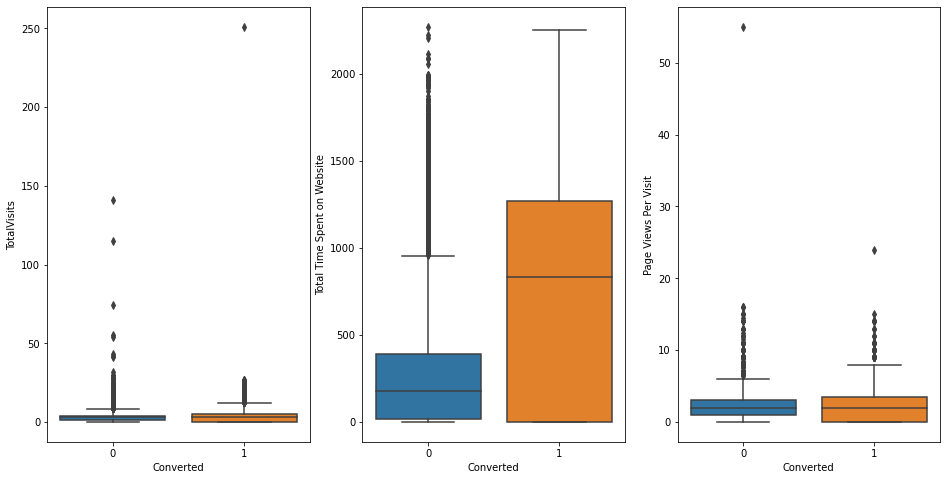

In [49]:
fig=plt.subplots(1,2,figsize=(16, 8))

plt.subplot(1, 3, 1)
#sns.boxplot(y=leads], hue=leads["Converted"])
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

plt.subplot(1, 3, 2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)

plt.subplot(1, 3, 3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)

In [50]:
percentlist = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0]
includelist = ['object', 'float', 'int']
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles = percentlist, include = includelist)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000


In [51]:
# For the reamining fields with missing values
leads[leads.TotalVisits.isnull()]

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
77,659722,Lead Add Form,Other Sources,1,NaN,1096,NaN,NaN,Unknown Specialization,Unknown Tags,Unrecorded City,0,Modified
79,659710,Lead Add Form,Reference,1,NaN,705,NaN,NaN,Other Specialization,Will revert after reading the email,Thane & Outskirts,0,Modified
81,659705,Lead Add Form,Other Sources,1,NaN,346,NaN,NaN,Unknown Specialization,Unknown Tags,Unrecorded City,0,Modified
88,659631,Lead Add Form,Reference,1,NaN,1007,NaN,NaN,Human Resource Management,Closed by Horizzon,Mumbai,0,Modified
120,659283,Lead Add Form,Reference,1,NaN,1111,NaN,NaN,Marketing Management,Closed by Horizzon,Other Cities,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,587973,Lead Add Form,Reference,0,NaN,1201,NaN,NaN,Marketing Management,Other Tags,Unrecorded City,0,Modified
8107,587916,Lead Add Form,Reference,1,NaN,903,NaN,NaN,Other Specialization,Other Tags,Unrecorded City,0,Modified
8434,585438,Lead Add Form,Reference,1,NaN,1458,NaN,NaN,Unknown Specialization,Closed by Horizzon,Unrecorded City,0,Modified
9015,581257,Lead Add Form,Reference,1,NaN,1159,NaN,NaN,Other Specialization,Closed by Horizzon,Mumbai,0,Modified


In [52]:
# The records with null values of "TotalVisits" also has null Values for Page Views Per Visit and also for Last Activity
# So this records can be dropped
leads.dropna(inplace=True)

In [53]:
# Checking Outliers
percentlist = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0]
includelist = ['object', 'float', 'int']
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles = percentlist, include = includelist)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.445238,481.350104,2.362820
std,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,9.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,919.500000,3.000000
90%,7.000000,1372.000000,5.000000
95%,10.000000,1556.900000,6.000000


In [54]:
# Capping the max values to the 99% percentile
leads.loc[leads['TotalVisits'] > np.percentile(leads['TotalVisits'], 99) , 'TotalVisits'] = int(np.percentile(leads['TotalVisits'], 99))
leads.loc[leads['Total Time Spent on Website'] > np.percentile(leads['Total Time Spent on Website'], 99) , 'Total Time Spent on Website'] = round(np.percentile(leads['Total Time Spent on Website'], 99),0)
leads.loc[leads['Page Views Per Visit'] > np.percentile(leads['Page Views Per Visit'], 99) , 'Page Views Per Visit'] = int(np.percentile(leads['Page Views Per Visit'], 99))


In [55]:
percentlist = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0]
includelist = ['object', 'float', 'int']
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles = percentlist, include = includelist)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.00000,9103.000000
mean,3.332747,480.22586,2.334002
std,3.252420,542.03797,1.985712
min,0.000000,0.00000,0.000000
10%,0.000000,0.00000,0.000000
25%,1.000000,9.00000,1.000000
50%,3.000000,244.00000,2.000000
75%,5.000000,919.50000,3.000000
90%,7.000000,1372.00000,5.000000
95%,10.000000,1556.90000,6.000000


In [56]:
round(leads.isnull().sum()*100/leads.shape[0], 4)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [57]:
# Checking for unique values in the columns
leads.nunique()

Lead Number                               9103
Lead Origin                                  4
Lead Source                                  6
Converted                                    2
TotalVisits                                 18
Total Time Spent on Website               1643
Page Views Per Visit                       102
Last Activity                                6
Specialization                               8
Tags                                         8
City                                         7
A free copy of Mastering The Interview       2
Last Notable Activity                        4
dtype: int64

In [58]:
# Checking the values of the different columns
for col in leads.iloc[:,1:].select_dtypes(include='object').columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True))
    print("========================================================")
    
for col in leads.iloc[:,1:].select_dtypes(include='float').columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True))
    print("========================================================") 

for col in leads.iloc[:,1:].select_dtypes(include='int').columns:
    print("========================================================")
    print(col)
    print("--------------------------------------------------------")
    print(leads[col].value_counts(normalize= True))
    print("========================================================")

Lead Origin
--------------------------------------------------------
Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64
Lead Source
--------------------------------------------------------
Google            0.315610
Direct Traffic    0.279358
Olark Chat        0.192574
Organic Search    0.126771
Reference         0.048665
Other Sources     0.037021
Name: Lead Source, dtype: float64
Last Activity
--------------------------------------------------------
Email Opened               0.377568
SMS Sent                   0.300780
Olark Chat Conversation    0.106778
Other Last Activity        0.097550
Page Visited on Website    0.070306
Converted to Lead          0.047017
Name: Last Activity, dtype: float64
Specialization
--------------------------------------------------------
Unknown Specialization       0.362957
Other Specialization         0.209821
Finance Managemen

In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   int64  
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

### % Data Records dropped

In [60]:
noofdatarecordsaftercleaning = leads.shape[0]
print("Final Number of Data Records - ", noofdatarecordsaftercleaning)

Final Number of Data Records -  9103


In [61]:
print(" ==================== Data Set Statistics =====================")
print("Initial Number of Data Records - ", initialdatarecords)
print("Final Number of Data Records - ", noofdatarecordsaftercleaning)
print('% of Data Records retained - ' , round(noofdatarecordsaftercleaning/initialdatarecords * 100, 2))
print(" ==============================================================")

 ==================== Data Set Statistics =====================
Initial Number of Data Records -  9240
Final Number of Data Records -  9103
% of Data Records retained -  98.52


### Exploratory Data Analysis - univariate analysis, bivariate analysis, outlier detection, data skewness

In [62]:
# Checking about the data in the target variable
leads["Converted"].value_counts(normalize=True)

0    0.619796
1    0.380204
Name: Converted, dtype: float64

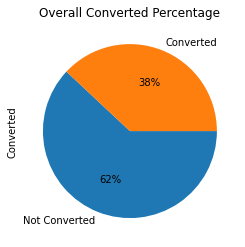

In [63]:
leads.Converted.value_counts().plot.pie(autopct='%.0f%%',counterclock = False, labels = ['Not Converted', 'Converted'])
plt.title("Overall Converted Percentage")
plt.show()

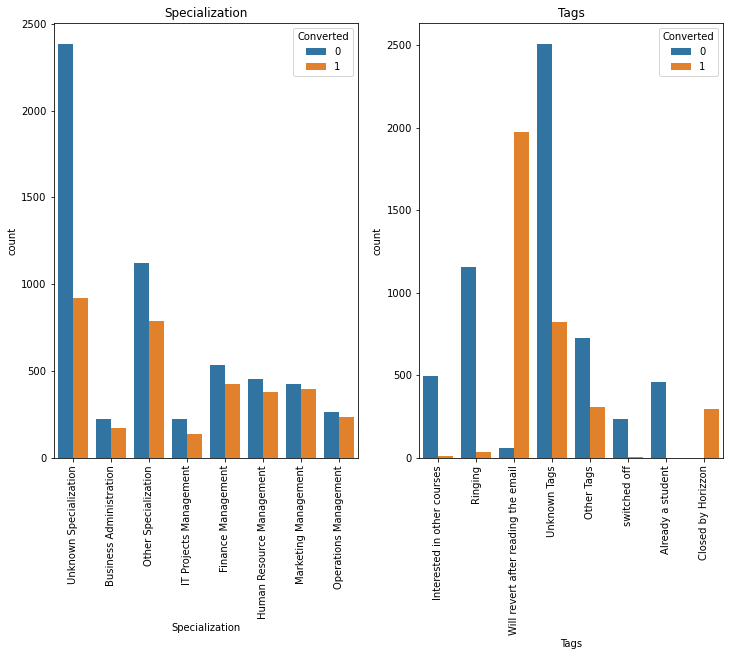

In [64]:
#plot the bar graph of Specoalliastion and A free copy of Mastering The Interview with convereted

fig=plt.subplots(1,2,figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(x = leads["Specialization"], hue=leads["Converted"])
plt.xticks(rotation=90)
plt.title("Specialization")

plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(x = leads["Tags"], hue=leads["Converted"])
plt.title("Tags")
plt.xticks(rotation=90)
plt.show()


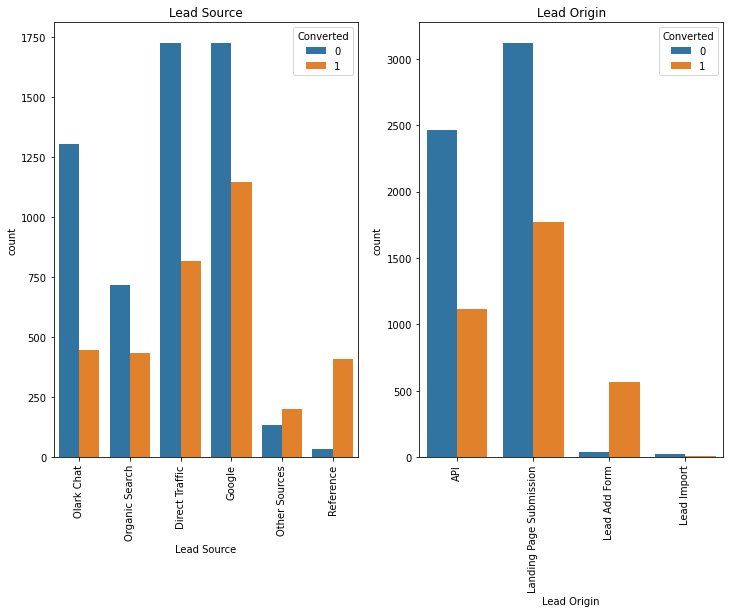

In [65]:
fig=plt.subplots(1,2,figsize=(12, 8))

plt.subplot(1, 2,1)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(leads['Lead Source'], hue=leads["Converted"])
plt.xticks(rotation=90)
plt.title('Lead Source')

plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(leads['Lead Origin'], hue=leads["Converted"])
plt.xticks(rotation=90)
plt.title('Lead Origin')
plt.show()

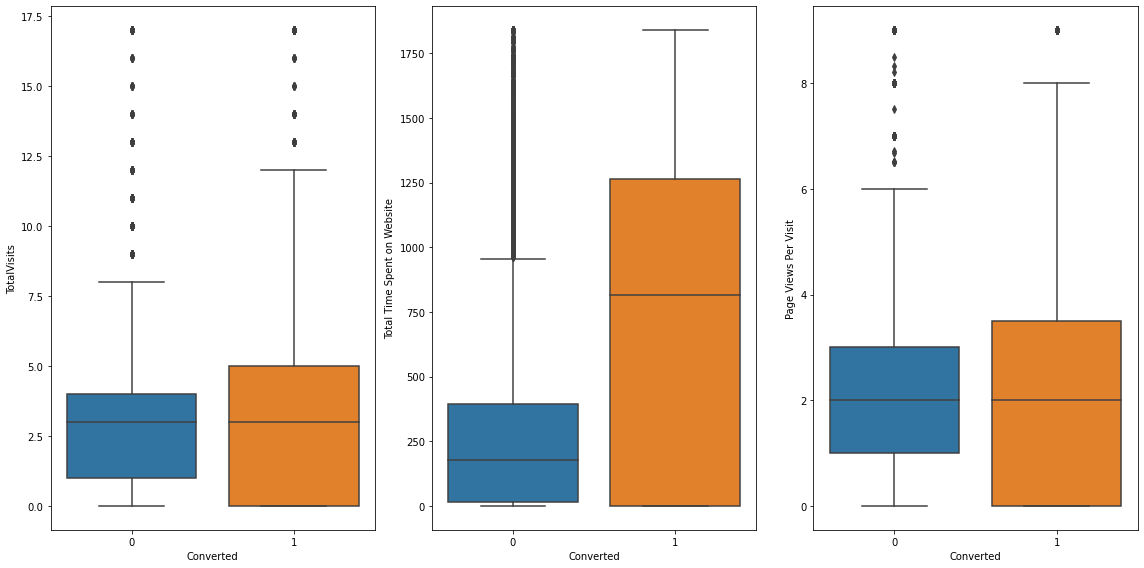

In [66]:
fig=plt.subplots(1,3,figsize=(16, 8))

for i, feature in enumerate(['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y = feature, x = 'Converted', data = leads)
    plt.tight_layout()

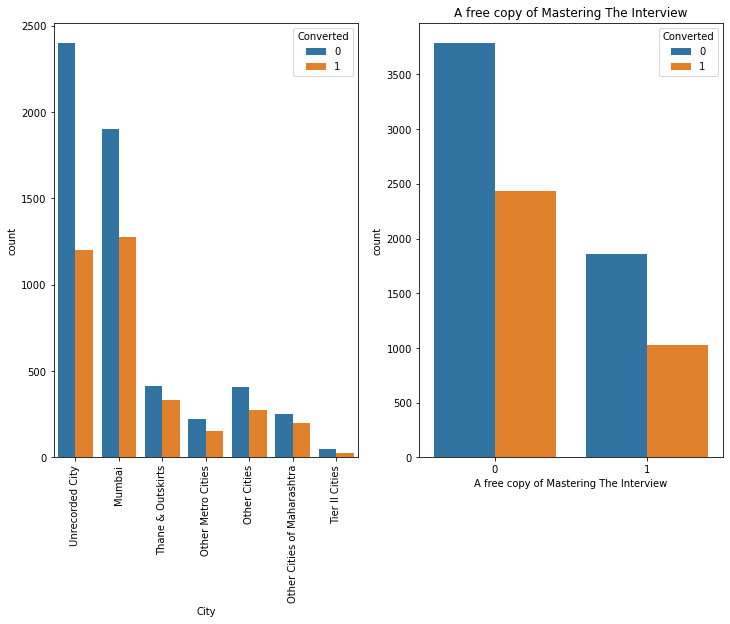

In [67]:
fig=plt.subplots(1,2,figsize=(12, 8))

plt.subplot(1, 2,1)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(leads['City'], hue=leads["Converted"])
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(x = leads["A free copy of Mastering The Interview"], hue=leads["Converted"])
plt.title("A free copy of Mastering The Interview")
plt.show()


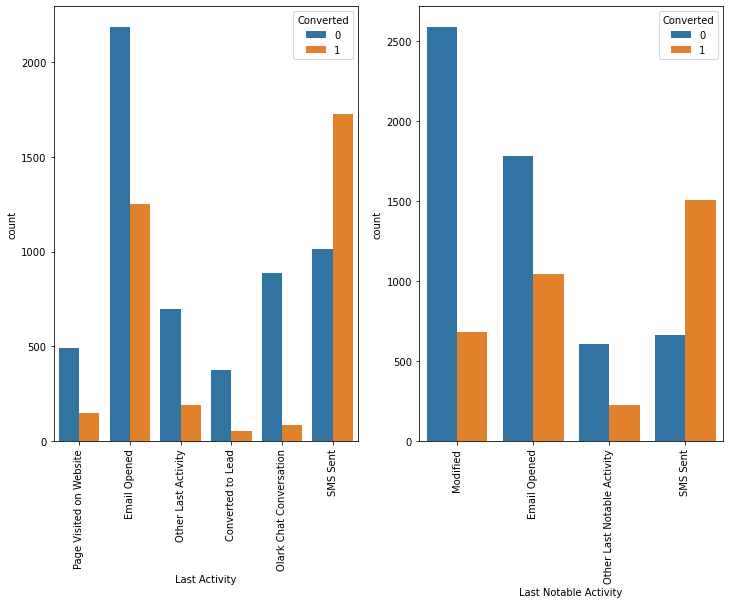

In [68]:
fig=plt.subplots(1,2,figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(leads['Last Activity'], hue=leads["Converted"])
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.subplots_adjust(hspace = 2.0)
sns.countplot(leads['Last Notable Activity'], hue=leads["Converted"])
plt.xticks(rotation=90)
plt.show()

In [69]:
round(leads.isnull().sum()*100/leads.shape[0], 4)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### To check the correlation among the features

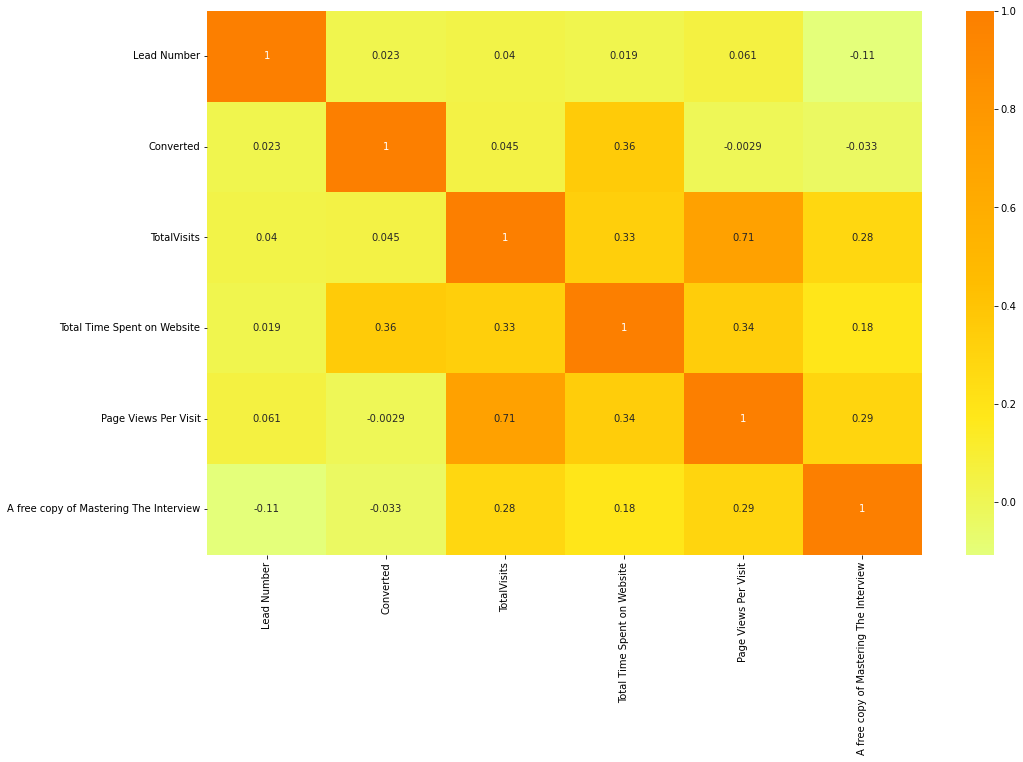

In [70]:
plt.figure(figsize=(16,10))
sns.heatmap(leads.corr(),  annot = True, cmap = 'Wistia')
plt.show()

### Dummy Variable Creation

In [71]:
# For categorical variables with multiple levels, create dummy features (one-hot encoded)
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)


In [72]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags','City','Last Notable Activity'], 1)

In [73]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Lead Number                                        9103 non-null   int64  
 1   Converted                                          9103 non-null   int64  
 2   TotalVisits                                        9103 non-null   float64
 3   Total Time Spent on Website                        9103 non-null   int64  
 4   Page Views Per Visit                               9103 non-null   float64
 5   A free copy of Mastering The Interview             9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                9103 non-null   uint8  
 7   Lead Origin_Lead Add Form                          9103 non-null   uint8  
 8   Lead Origin_Lead Import                            9103 non-null   uint8  
 9   Lead Sou

### Test-Train Split

In [74]:
# Putting feature/independent variables to X and removing target dependent variable
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unrecorded City,Last Notable Activity_Modified,Last Notable Activity_Other Last Notable Activity,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
# Scaling data

In [78]:
# checking for skewness in the continous data fields to decide the scaler
leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].skew(axis = 0)

TotalVisits                    1.608275
Total Time Spent on Website    0.951991
Page Views Per Visit           0.913775
dtype: float64

In [79]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]= scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
                                                                                                    

#### Looking at Correlations

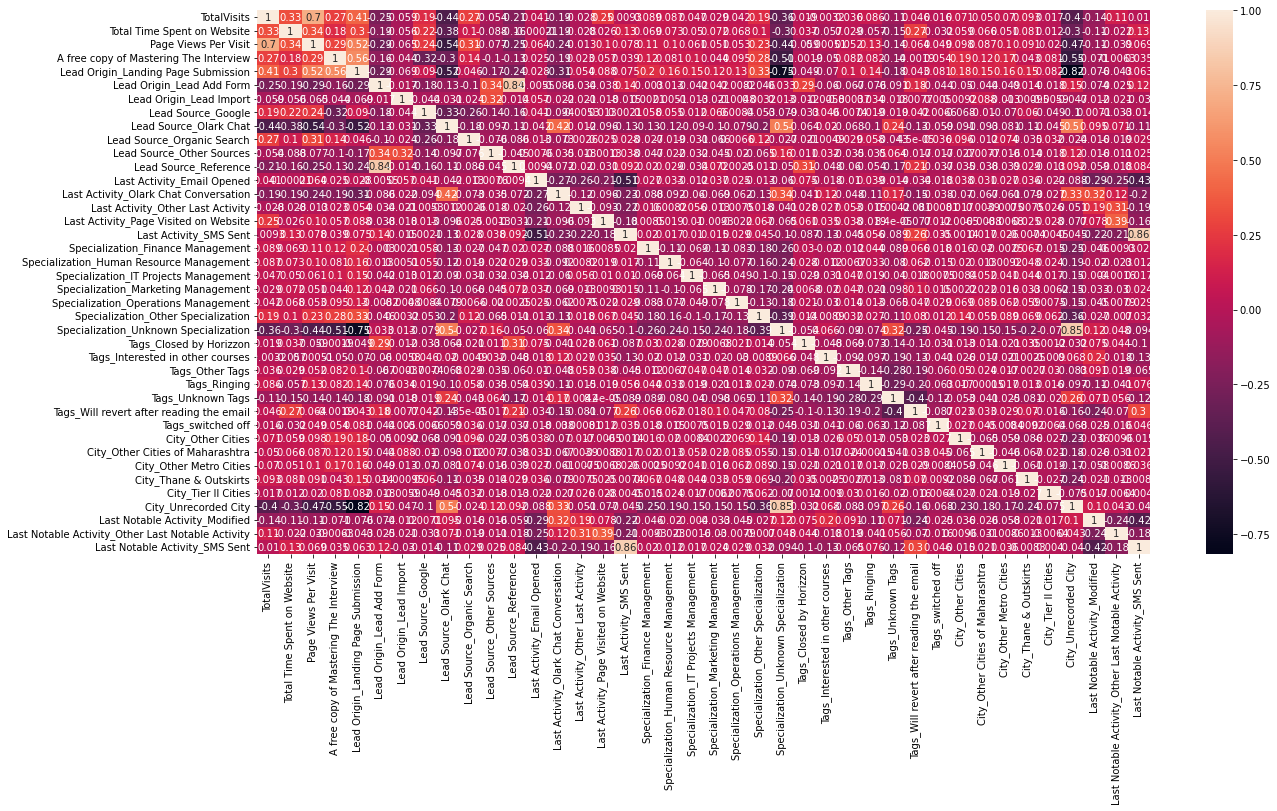

In [80]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [81]:
print(X_train.corr())

                                                   TotalVisits  \
TotalVisits                                           1.000000   
Total Time Spent on Website                           0.329093   
Page Views Per Visit                                  0.702945   
A free copy of Mastering The Interview                0.274270   
Lead Origin_Landing Page Submission                   0.409856   
Lead Origin_Lead Add Form                            -0.248671   
Lead Origin_Lead Import                              -0.059296   
Lead Source_Google                                    0.188769   
Lead Source_Olark Chat                               -0.443964   
Lead Source_Organic Search                            0.270750   
Lead Source_Other Sources                            -0.054263   
Lead Source_Reference                                -0.208686   
Last Activity_Email Opened                            0.041035   
Last Activity_Olark Chat Conversation                -0.189964   
Last Activ

### Model Preparation

In [82]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.9
Date:                Tue, 18 Oct 2022   Deviance:                       2887.9
Time:                        18:28:55   Pearson chi2:                 7.93e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5830
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -6.9620      0.789     -8.823      0.000      -8.508      -5.416
TotalVisits                                           1.8669      0.369      5.056      0.000       1.143       2.591
Total Time Spent on Website                           3.7336      0.192     19.420      0.000       3.357       4.110
Page Views Per Visit                                 -1.5593      0.372     -4.188      0.000      -2.289      -0.830
A free copy of Mastering The Interview                0.2648      0.158      1.675      0.094      -0.045       0.575
Lead Origin_Landing Page Submission                  -0.1709      0.222     -0.771      0.441      -0.605       0.264
Lead Origin_Lead Add Form                             4.7793      0.681      7.022      0.000       3.445       6.113
Lead Origin_Lead Import                               1.3655      0.881      1.551      0.121      -0.361       3.092
Lead Source_Google                                    0.2251      0.163      1.379      0.168      -0.095       0.545
Lead Source_Olark Chat                                1.1757      0.222      5.290      0.000       0.740       1.611
Lead Source_Organic Search                            0.0185      0.184      0.100      0.920      -0.343       0.380
Lead Source_Other Sources                             0.1004      0.442      0.227      0.820      -0.767       0.967
Lead Source_Reference                                -2.7111      0.798     -3.398      0.001      -4.275      -1.147
Last Activity_Email Opened                            1.0574      0.324      3.260      0.001       0.422       1.693
Last Activity_Olark Chat Conversation                -0.6704      0.349     -1.923      0.055      -1.354       0.013
Last Activity_Other Last Activity                     0.1729      0.333      0.520      0.603      -0.479       0.825
Last Activity_Page Visited on Website                -0.0858      0.362     -0.237      0.812      -0.794       0.623
Last Activity_SMS Sent                                1.4438      0.323      4.476      0.000       0.812       2.076
Specialization_Finance Management                     0.0213      0.293      0.073      0.942      -0.553       0.596
Specialization_Human Resource Management             -0.0772      0.296     -0.261      0.794      -0.657       0.503
Specialization_IT Projects Management                 0.3172      0.346      0.918      0.359      -0.360       0.995
Specialization_Marketing Management                   0.3634      0.289      1.257      0.209      -0.203       0.930
Specialization_Operations Management                  0.1680      0.326      0.516      0.606      -0.470       0.806
Specialization_

In [83]:
# Logistic Regression
logreg = LogisticRegression()

#### Modelling using RFE

In [84]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [85]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 13),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Other Sources', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Other Last Activity', False, 17),
 ('Last Activity_Page Visited on Website', False, 19),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Human Resource Management', False, 23),
 ('Specialization_IT Projects Management', False, 8),
 ('Specialization_Marketing Management', False, 7),
 ('Specialization_Operations Management', False, 15),

In [86]:
col = X_train.columns[rfe.support_]

In [87]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [88]:
# Assessing the model with StatsModels

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1470.7
Date:                Tue, 18 Oct 2022   Deviance:                       2941.5
Time:                        18:28:57   Pearson chi2:                 7.55e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5794
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.1679      0.349    -17.696      0.000      -6.851      -5.485
TotalVisits                                  1.9046      0.346      5.497      0.000       1.226       2.584
Total Time Spent on Website                  3.6777      0.187     19.632      0.000       3.311       4.045
Page Views Per Visit                        -1.9682      0.353     -5.580      0.000      -2.660      -1.277
Lead Origin_Lead Add Form                    4.8826      0.543      8.984      0.000       3.817       5.948
Lead Source_Olark Chat                       1.0771      0.163      6.590      0.000       0.757       1.397
Lead Source_Reference                       -2.8496      0.664     -4.292      0.000      -4.151      -1.548
Last Activity_Email Opened                   1.2310      0.124      9.945      0.000       0.988       1.474
Last Activity_SMS Sent                       1.3527      0.197      6.868      0.000       0.967       1.739
Tags_Closed by Horizzon                      8.4632      0.789     10.731      0.000       6.917      10.009
Tags_Other Tags                              2.8172      0.322      8.750      0.000       2.186       3.448
Tags_Ringing                                -0.8676      0.390     -2.225      0.026      -1.632      -0.103
Tags_Unknown Tags                            2.4503      0.313      7.830      0.000       1.837       3.064
Tags_Will revert after reading the email     7.0395      0.355     19.837      0.000       6.344       7.735
Tags_switched off                           -1.0478      0.681     -1.540      0.124      -2.382       0.286
Last Notable Activity_SMS Sent               1.7290      0.195      8.851      0.000       1.346       2.112
============================================================================================================
"""

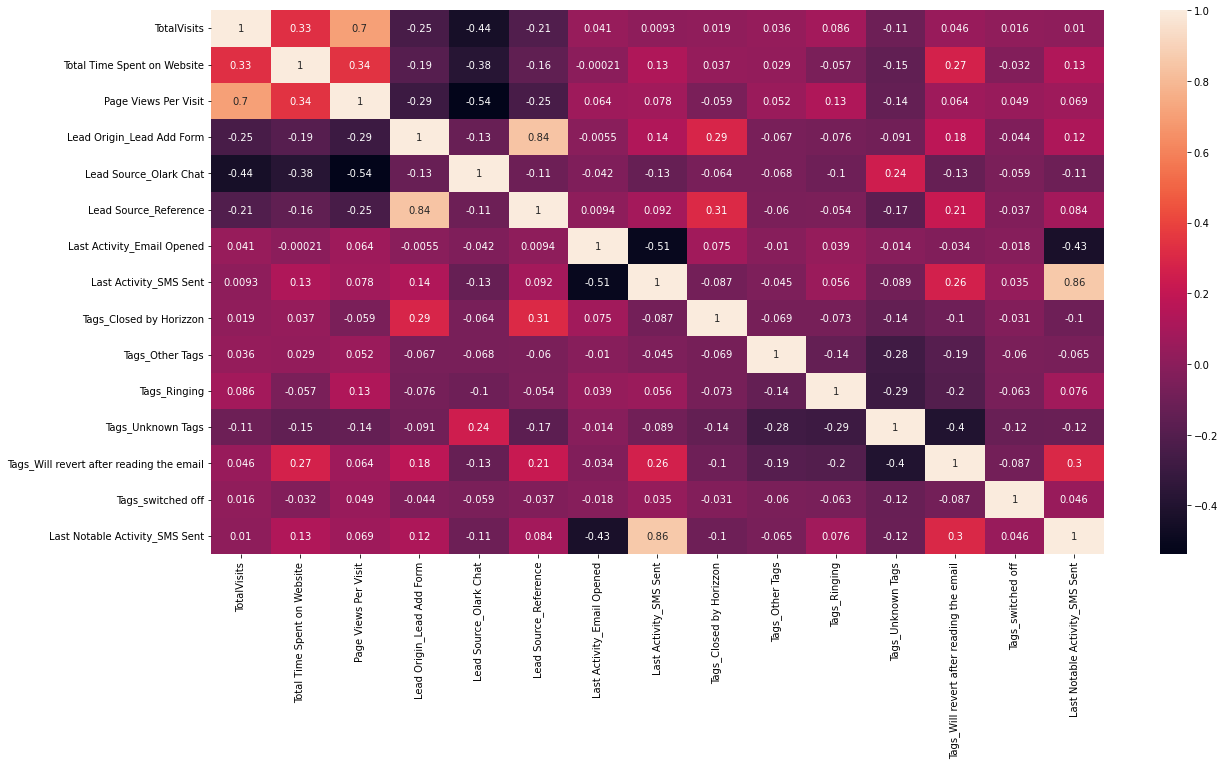

In [90]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [91]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.909768
5520    0.060293
1962    0.004024
1566    0.995447
9170    0.020636
5097    0.196304
8954    0.046413
309     0.933513
5519    0.608530
1050    0.983161
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.90976846, 0.06029309, 0.0040235 , 0.99544721, 0.0206364 ,
       0.19630393, 0.04641321, 0.93351329, 0.60852982, 0.98316078])

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index

In [94]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.909768,7962
1,0,0.060293,5520
2,0,0.004024,1962
3,1,0.995447,1566
4,0,0.020636,9170


In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.909768,7962,1
1,0,0.060293,5520,0
2,0,0.004024,1962,0
3,1,0.995447,1566,1
4,0,0.020636,9170,0


#### Confusion matrix 

In [96]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3759  194]
 [ 385 2034]]


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9091337099811676


#### Checking for VIF

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,6.06
2,Page Views Per Visit,5.52
14,Last Notable Activity_SMS Sent,5.23
0,TotalVisits,4.17
3,Lead Origin_Lead Add Form,4.02
5,Lead Source_Reference,3.75
12,Tags_Will revert after reading the email,2.89
11,Tags_Unknown Tags,2.82
1,Total Time Spent on Website,2.44
6,Last Activity_Email Opened,2.15


In [99]:
# Let's drop Last Activity_SMS Sent since it has a high VIF
col = col.drop('Last Activity_SMS Sent')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Tags_Closed by Horizzon', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Unknown Tags', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [100]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1493.1
Date:                Tue, 18 Oct 2022   Deviance:                       2986.2
Time:                        18:28:59   Pearson chi2:                 7.73e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5765
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.9242      0.342    -17.303      0.000      -6.595      -5.253
TotalVisits                                  1.7794      0.341      5.215      0.000       1.111       2.448
Total Time Spent on Website                  3.6781      0.186     19.746      0.000       3.313       4.043
Page Views Per Visit                        -1.7943      0.350     -5.125      0.000      -2.481      -1.108
Lead Origin_Lead Add Form                    5.1347      0.544      9.437      0.000       4.068       6.201
Lead Source_Olark Chat                       1.0093      0.161      6.255      0.000       0.693       1.326
Lead Source_Reference                       -2.8699      0.666     -4.308      0.000      -4.175      -1.564
Last Activity_Email Opened                   0.9360      0.112      8.392      0.000       0.717       1.155
Tags_Closed by Horizzon                      8.4160      0.786     10.712      0.000       6.876       9.956
Tags_Other Tags                              2.8558      0.320      8.918      0.000       2.228       3.483
Tags_Ringing                                -0.8305      0.389     -2.133      0.033      -1.594      -0.067
Tags_Unknown Tags                            2.5100      0.311      8.059      0.000       1.900       3.121
Tags_Will revert after reading the email     7.0151      0.352     19.942      0.000       6.326       7.705
Tags_switched off                           -0.9810      0.680     -1.443      0.149      -2.313       0.351
Last Notable Activity_SMS Sent               2.7699      0.134     20.601      0.000       2.506       3.033
============================================================================================================
"""

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index

In [103]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3757  196]
 [ 391 2028]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9078782172002511


In [106]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.46
0,TotalVisits,4.17
3,Lead Origin_Lead Add Form,3.99
5,Lead Source_Reference,3.75
11,Tags_Will revert after reading the email,2.83
10,Tags_Unknown Tags,2.71
1,Total Time Spent on Website,2.43
6,Last Activity_Email Opened,1.97
13,Last Notable Activity_SMS Sent,1.97
4,Lead Source_Olark Chat,1.75


In [107]:
# Let's drop Page Views Per Visit since it has a high VIF
col = col.drop('Page Views Per Visit')
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Tags_Closed by Horizzon', 'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Unknown Tags', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [108]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1506.6
Date:                Tue, 18 Oct 2022   Deviance:                       3013.3
Time:                        18:28:59   Pearson chi2:                 8.04e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5747
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.2227      0.340    -18.327      0.000      -6.888      -5.557
TotalVisits                                  0.8163      0.290      2.817      0.005       0.248       1.384
Total Time Spent on Website                  3.6669      0.185     19.788      0.000       3.304       4.030
Lead Origin_Lead Add Form                    5.4619      0.540     10.111      0.000       4.403       6.521
Lead Source_Olark Chat                       1.3405      0.149      8.999      0.000       1.049       1.632
Lead Source_Reference                       -2.8221      0.665     -4.245      0.000      -4.125      -1.519
Last Activity_Email Opened                   0.8993      0.111      8.112      0.000       0.682       1.117
Tags_Closed by Horizzon                      8.3923      0.783     10.713      0.000       6.857       9.928
Tags_Other Tags                              2.8318      0.321      8.826      0.000       2.203       3.461
Tags_Ringing                                -0.8599      0.390     -2.206      0.027      -1.624      -0.096
Tags_Unknown Tags                            2.5050      0.312      8.026      0.000       1.893       3.117
Tags_Will revert after reading the email     6.9389      0.351     19.753      0.000       6.250       7.627
Tags_switched off                           -0.9680      0.677     -1.429      0.153      -2.295       0.359
Last Notable Activity_SMS Sent               2.6908      0.133     20.308      0.000       2.431       2.950
============================================================================================================
"""

In [109]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [110]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index

In [111]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [112]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3757  196]
 [ 384 2035]]


In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9089767733835531


#### Checking VIF

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.92
4,Lead Source_Reference,3.75
10,Tags_Will revert after reading the email,2.69
0,TotalVisits,2.56
9,Tags_Unknown Tags,2.49
1,Total Time Spent on Website,2.42
12,Last Notable Activity_SMS Sent,1.95
5,Last Activity_Email Opened,1.92
3,Lead Source_Olark Chat,1.61
8,Tags_Ringing,1.58


In [115]:
# Checking with 0.5 as the threshold for cutoff

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead Number,predicted
7962,0,0.881666,7962,1
5520,0,0.115505,5520,0
1962,0,0.001340,1962,0
1566,1,0.991527,1566,1
9170,0,0.018292,9170,0
5097,0,0.185754,5097,0
8954,0,0.031431,8954,0
309,1,0.915294,309,1
5519,1,0.577767,5519,1
1050,1,0.979827,1050,1


In [117]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3757  196]
 [ 384 2035]]


In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9089767733835531


In [119]:
# Other Metrics 

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall - ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity - ',TN / float(TN+FP))
# positive predictive value - Precision
print ('Precision - ', TP / float(TP+FP))
# Calculate false postive rate - predicting conversion when customer has not converted
print('False postive rate - predicting conversion when customer has not converted - ' , FP/ float(TN+FP))
# Negative predictive value  - predicting actual non-conversion rate
print ('Predicting non-conversion among all customers' , TN / float(TN+ FN))

Sensitivity/Recall -  0.8412567176519223
Specificity -  0.9504174045029092
Precision -  0.9121470192738682
False postive rate - predicting conversion when customer has not converted -  0.04958259549709082
Predicting non-conversion among all customers 0.9072687756580536


#### Precision and recall are most important in this case since we have to increase calling productivity by focussing on genuinely convertable persons(hot leads) . 
#### At the same we have to reduce the chances of missing out calling these genuinely interested persons

#### Checking the most signiificant feature from the above finalised model

In [122]:
print(res.params)

const                                      -6.222657
TotalVisits                                 0.816312
Total Time Spent on Website                 3.666934
Lead Origin_Lead Add Form                   5.461889
Lead Source_Olark Chat                      1.340468
Lead Source_Reference                      -2.822079
Last Activity_Email Opened                  0.899346
Tags_Closed by Horizzon                     8.392270
Tags_Other Tags                             2.831843
Tags_Ringing                               -0.859924
Tags_Unknown Tags                           2.505002
Tags_Will revert after reading the email    6.938861
Tags_switched off                          -0.967953
Last Notable Activity_SMS Sent              2.690800
dtype: float64


#### Checking the VIFs

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,3.92
4,Lead Source_Reference,3.75
10,Tags_Will revert after reading the email,2.69
0,TotalVisits,2.56
9,Tags_Unknown Tags,2.49
1,Total Time Spent on Website,2.42
12,Last Notable Activity_SMS Sent,1.95
5,Last Activity_Email Opened,1.92
3,Lead Source_Olark Chat,1.61
8,Tags_Ringing,1.58


#### Plotting the ROC Curve

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

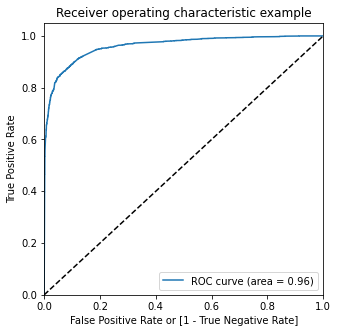

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.881666,7962,1,1,1,1,1,1,1,1,1,1,0
5520,0,0.115505,5520,0,1,1,0,0,0,0,0,0,0,0
1962,0,0.001340,1962,0,1,0,0,0,0,0,0,0,0,0
1566,1,0.991527,1566,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.018292,9170,0,1,0,0,0,0,0,0,0,0,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','specificity','recall','precision'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    cutoff_df.loc[i] =[ i ,accuracy,specificity,recall, precision]
print(cutoff_df)

     probability  accuracy  specificity    recall  precision
0.0          0.0  0.379630     0.000000  1.000000   0.379630
0.1          0.1  0.806811     0.707817  0.968582   0.669811
0.2          0.2  0.887006     0.867948  0.918148   0.809697
0.3          0.3  0.896579     0.900582  0.890037   0.845640
0.4          0.4  0.902699     0.925373  0.865647   0.876517
0.5          0.5  0.908977     0.950417  0.841257   0.912147
0.6          0.6  0.900188     0.968884  0.787929   0.939379
0.7          0.7  0.896893     0.976727  0.766432   0.952724
0.8          0.8  0.886692     0.982545  0.730054   0.962398
0.9          0.9  0.864407     0.991652  0.656470   0.979642


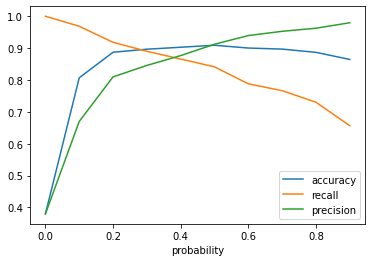

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','recall','precision'])
plt.show()

### From the curve above, where precision and sensitivity are most importtant
### 0.4 seems to be the optimum point to take it as a cutoff probability.

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
7962,0,0.881666,7962,1,1,1,1,1,1,1,1,1,1,0,1
5520,0,0.115505,5520,0,1,1,0,0,0,0,0,0,0,0,0
1962,0,0.001340,1962,0,1,0,0,0,0,0,0,0,0,0,0
1566,1,0.991527,1566,1,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.018292,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9026993094789705

In [132]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3658,  295],
       [ 325, 2094]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Let's see the accuracy of our logistic regression model
accuracy = (TP+TN) / float(TP+FP+TN+FN)

In [135]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)

In [136]:
# Let's see the Precision of our logistic regression model
precision = TP / float(TP+FN)

In [137]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity/Recall - ', sensitivity)
# Let us calculate specificity
print('Accuracy - ', accuracy)
# positive predictive value - Precision
print ('Precision - ', precision)

Sensitivity/Recall -  0.8656469615543613
Accuracy -  0.9026993094789705
Precision -  0.8656469615543613


In [138]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(" ==================== Metrics based on Train Set Data =====================")
print("Accuracy: ", accuracy_score(y_train,y_train_pred_final.final_predicted))
print("Recall: ", recall_score(y_train,y_train_pred_final.final_predicted))
print("Precision: ", precision_score(y_train,y_train_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_train,y_train_pred_final.final_predicted))
print(" ==========================================================================")

 ==================== Metrics based on Train Set Data =====================
Accuracy:  0.9026993094789705
Recall:  0.8656469615543613
Precision:  0.8765173712850565
F1-Score:  0.8710482529118136


### Evaluating on the Test set

In [139]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Tags_Closed by Horizzon,Tags_Other Tags,Tags_Ringing,Tags_Unknown Tags,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3504,0.176471,0.230560,0,0,0,1,0,0,1,0,0,0,0
4050,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,1
7201,0.117647,0.387167,0,0,0,0,0,1,0,0,0,0,1
1196,0.235294,0.230016,0,0,0,1,0,0,1,0,0,0,0
8219,0.411765,0.134312,0,0,0,0,0,1,0,0,0,0,0


In [140]:
X_test_sm = sm.add_constant(X_test)

In [141]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [142]:
# Converting y_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)

In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [145]:
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [146]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

In [147]:
y_test_pred_final.head()

,Converted,Lead Number,0
0,0,3504,0.005521
1,1,4050,0.997640
2,0,7201,0.693331
3,0,1196,0.005779
4,1,8219,0.071613


In [148]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [149]:
y_test_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,3504,0.005521
1,1,4050,0.997640
2,0,7201,0.693331
3,0,1196,0.005779
4,1,8219,0.071613


In [150]:
y_test_pred_final.shape

(2731, 3)

#### Using the Probability Cut-off of 0.4 as in train  dataset

In [151]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [152]:
print(" ==================== Metrics based on Test Set Data =====================")
print("Accuracy: ", accuracy_score(y_test,y_test_pred_final.final_predicted))
print("Recall: ", recall_score(y_test,y_test_pred_final.final_predicted))
print("Precision: ", precision_score(y_test,y_test_pred_final.final_predicted))
print("F1-Score: ", f1_score(y_test,y_test_pred_final.final_predicted))
print(" =========================================================================")

 ==================== Metrics based on Test Set Data =====================
Accuracy:  0.9172464298791652
Recall:  0.8790786948176583
Precision:  0.9015748031496063
F1-Score:  0.8901846452866861


In [153]:
print(y_train_pred_final[['Lead Number', 'Converted', 'Converted_Prob']].shape, y_test_pred_final.shape)

(6372, 3) (2731, 4)


### Final output with the lead score 

In [154]:
# Combining the test and train date for a single data set 
# Create the lead number and Lead score for all data
y_final_model_train = y_train_pred_final[['Lead Number', 'Converted', 'Converted_Prob']].copy(deep=True)
y_final_model_test = y_test_pred_final[['Lead Number', 'Converted', 'Converted_Prob']].copy(deep=True)

y_final_model = pd.concat([y_final_model_train, y_final_model_test], axis=0)
y_final_model['Lead score'] = round(y_final_model.Converted_Prob * 100,0)

y_final_model.shape

(9103, 4)

In [155]:
y_final_model.sort_values(by='Lead Number', inplace = True)
y_final_model = y_final_model.reset_index(drop=True)

print(" ============ Final Lead Score with Lead Number and Conversion Probability ============")
y_final_model.head(10)

 ============ Final Lead Score with Lead Number and Conversion Probability ============


,Lead Number,Converted,Converted_Prob,Lead score
0,0,0,0.007523,1.0
1,1,0,0.009960,1.0
2,2,1,0.991561,99.0
3,3,0,0.001616,0.0
4,4,1,0.974904,97.0
5,5,0,0.084929,8.0
6,6,1,0.993185,99.0
7,7,0,0.084929,8.0
8,8,0,0.070391,7.0
9,9,0,0.075119,8.0


### Lead score as mentioned above is a measure of the conversion prababilty. This score will help define which are hot leads
### Based on mentioned problem statement and business objectives, we can consider a lead score of 40 to increase the lead conversion
